In [1]:
# 实现SVM
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC

In [2]:
# 显示数据分布
X, y = datasets.make_moons( n_samples=100, noise=0.15, random_state=42 )
def plot_dataset(X, y, axes):
    plt.plot( X[:,0][y==0], X[:,1][y==0], "bs" )
    plt.plot( X[:,0][y==1], X[:,1][y==1], "g^" )
    plt.axis( axes )
    plt.grid( True, which="both" )
    plt.xlabel(r"$x_l$")
    plt.ylabel(r"$x_2$")

In [3]:
# 训练模型
polynomial_svm_clf = Pipeline([
    ("poly_featutres", PolynomialFeatures(degree=3)), # 构造特征的多项式组合
    ("scaler", StandardScaler()), # 归一化
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42)) # SVM
])
polynomial_svm_clf.fit( X, y)

D:\anaconda\install\envs\dev\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_featutres', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

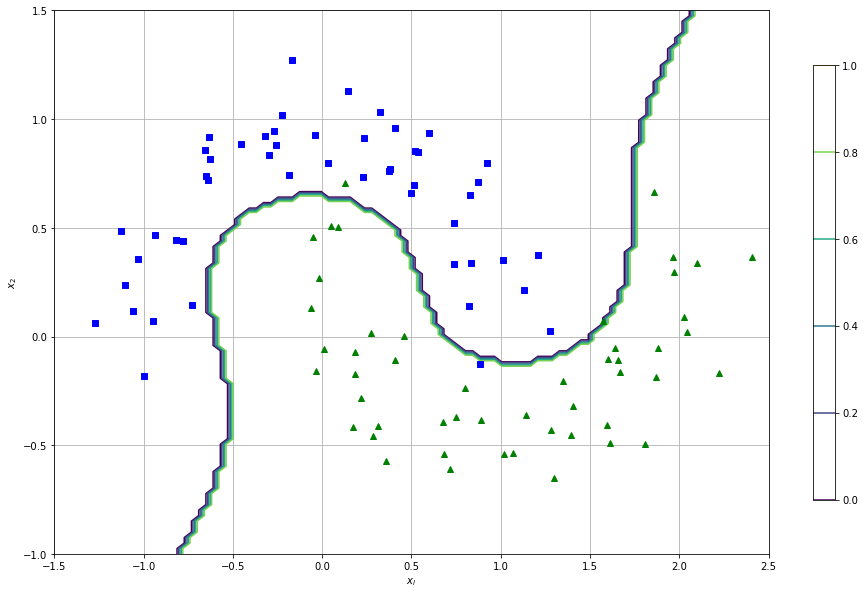

In [4]:
# 显示SVM的结果
def plot_predict(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid( x0s, x1s )
    # 构建出meshgrid中每个点作为输入
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict( X ).reshape( x0.shape )
    # 点到超平面的间隔
    y_decision = clf.decision_function( X ).reshape( x0.shape )
    # 自己对中间值做了填充
    c = plt.contour( x0, x1, y_pred, 5)
    # plt.contour( x0, x1, y_decision, cmap=plt.cm.winter)
    #等高线标签
    plt.colorbar(c, orientation='vertical', shrink=0.8)
plt.figure(figsize=(16,10))
plot_dataset( X, y, [-1.5, 2.5, -1, 1.5] )
plot_predict( polynomial_svm_clf, [-1.5, 2.5, -1, 1.5] )